# Imports

In [1]:
# to import files from googledrive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

import seaborn as sns
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime
from datetime import datetime
from datetime import date
today = datetime.today()

# Load the data and overall demographics

In [3]:
#df_dg = pd.read_csv('gdrive/My Drive/sample_size/data/12k_data_for_classifier.csv', parse_dates=['dob'])

df_dg = pd.read_csv('gdrive/My Drive/sample_size/diabetes/10k_data_for_classifier_diab.csv', parse_dates=['dob'])

In [4]:
df_dg.head()

,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label
0,7389,10935,V290,M,2184-03-22,WHITE,Nursing Progress Note\n\n\n#1 Continues on AMP...,26,0
1,2602,56746,25000,M,2076-12-22,WHITE,[**2143-2-26**] 8:47 AM\n CTA ABD & PELVIS ...,49,1
2,7986,93337,30000,M,2083-10-22,WHITE,Sinus rhythm. Normal tracing. Compared to the ...,35,0
3,2516,63192,25000,M,2130-01-20,WHITE,[**2193-9-9**] 11:45 AM\n CHEST PORT. LINE PLA...,40,1
4,9324,12451,4738,F,2091-07-09,WHITE,Nursing Progress/Transfer note 0700-1300\nPt a...,28,0


In [5]:
df_dg['gender'].value_counts()

M    5893
F    4107
Name: gender, dtype: int64

In [6]:
df_dg['gender'].value_counts(normalize=True)

M    0.5893
F    0.4107
Name: gender, dtype: float64

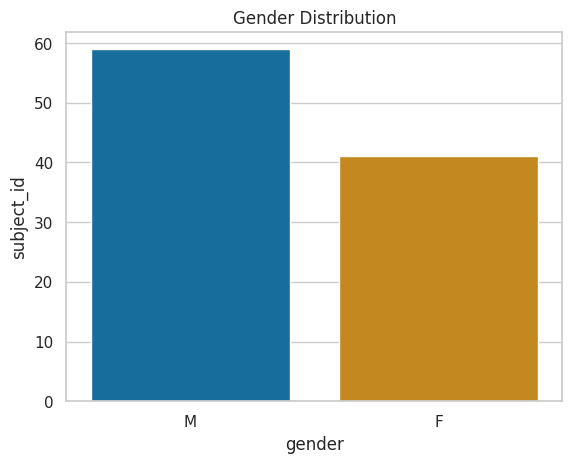

In [7]:
sns.set(style="whitegrid")

# use a different colour palette in count plot
ax = sns.barplot(x ='gender', y='subject_id', data = df_dg, palette = "colorblind", estimator=lambda x: len(x) / len(df_dg) * 100).set(title='Gender Distribution')

# Show the plot
plt.show()

In [8]:
# Percentage calculation
(df_dg['gender'].value_counts()/df_dg['gender'].count())*100

M    58.93
F    41.07
Name: gender, dtype: float64

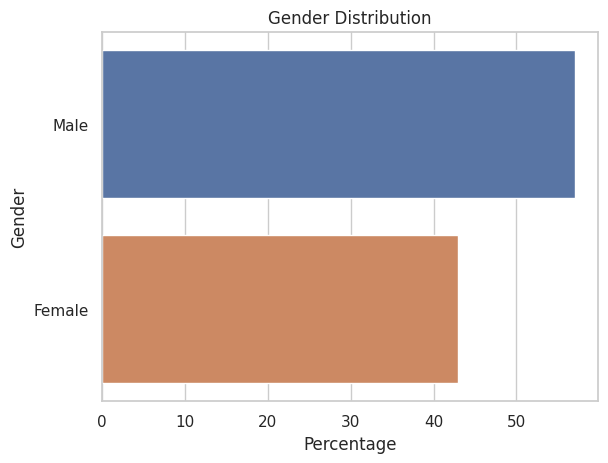

<Figure size 800x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
gender = pd.DataFrame({'Gender': ['Male', 'Female'], 'val': [57, 43]})
fig = sns.barplot(x = 'val', y = 'Gender', data = gender)
plt.xlabel("Percentage")
plt.ylabel("Gender")
plt.title("Gender Distribution") # You can comment this line out if you don't need title
plt.figure(figsize=(8, 8))
plt.style.use('tableau-colorblind10')

plt.show(fig)
plt.savefig('gdrive/My Drive/sample_size/all_gender.png')

In [10]:
df_dg['age'] = df_dg['dob'].apply(lambda x: (today - x).days // 365)
df_dg.head()

,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label,age
0,7389,10935,V290,M,2184-03-22,WHITE,Nursing Progress Note\n\n\n#1 Continues on AMP...,26,0,-161
1,2602,56746,25000,M,2076-12-22,WHITE,[**2143-2-26**] 8:47 AM\n CTA ABD & PELVIS ...,49,1,-54
2,7986,93337,30000,M,2083-10-22,WHITE,Sinus rhythm. Normal tracing. Compared to the ...,35,0,-61
3,2516,63192,25000,M,2130-01-20,WHITE,[**2193-9-9**] 11:45 AM\n CHEST PORT. LINE PLA...,40,1,-107
4,9324,12451,4738,F,2091-07-09,WHITE,Nursing Progress/Transfer note 0700-1300\nPt a...,28,0,-69


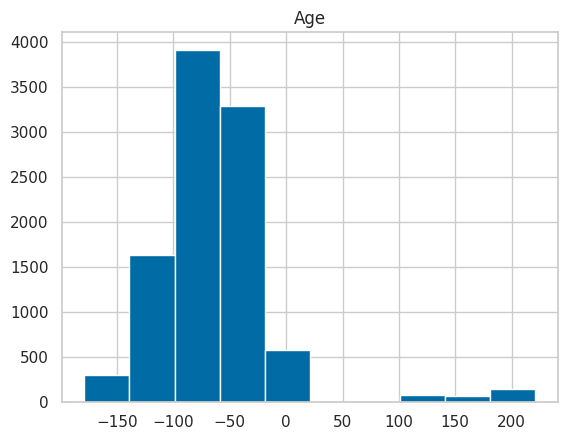

<Figure size 800x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
df_dg['age'].hist()
plt.title("Age")
plt.figure(figsize=(8, 8))
plt.style.use('tableau-colorblind10')

plt.show(fig)
plt.savefig('gdrive/My Drive/sample_size/diabetes/all_age.png')

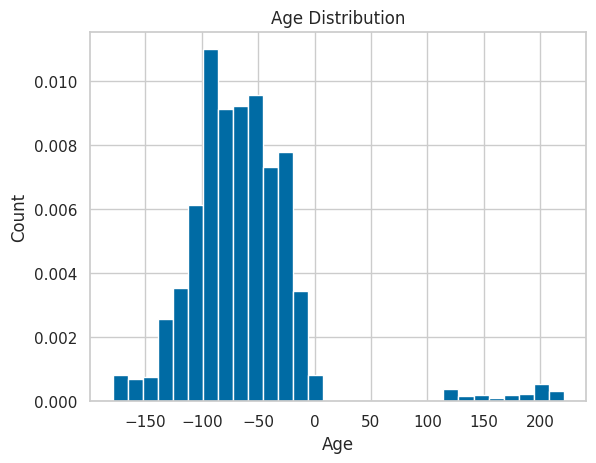

<Figure size 640x480 with 0 Axes>

In [12]:
plt.hist(df_dg['age'], density=True, bins=30)  # density=False would make counts
plt.style.use('tableau-colorblind10')
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Age Distribution') 

plt.show(fig)
plt.savefig('gdrive/My Drive/sample_size/diabetes/all_age_better.png');

In [13]:
df_dg['text_length'] = df_dg['text'].str.len()

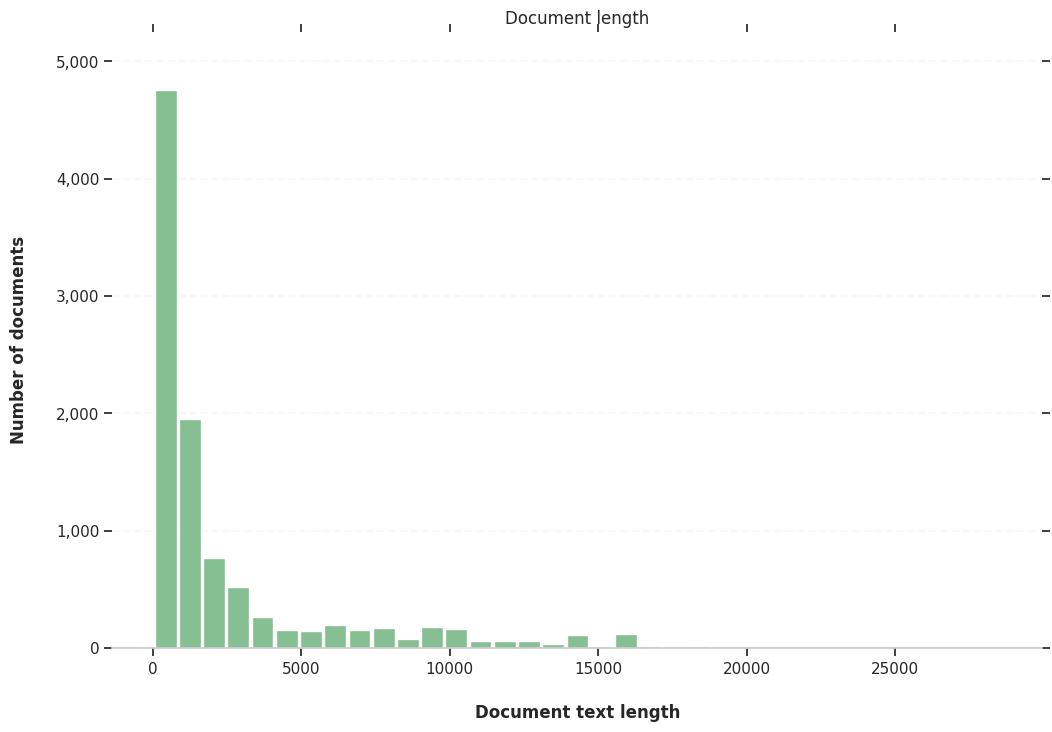

In [14]:
ax = df_dg.hist(column='text_length', bins=35, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Document length")

    # Set x-axis label
    x.set_xlabel("Document text length", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of documents", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# All HTN Demographics

In [16]:
#df_dg_htn = df_dg.loc[(df_dg['label'] == 1)]

df_dg_diab = df_dg.loc[(df_dg['label'] == 1)]

In [17]:
#df_dg_htn['gender'].value_counts(normalize=True)

df_dg_diab['gender'].value_counts(normalize=True)

M    0.6182
F    0.3818
Name: gender, dtype: float64

In [18]:
# Percentage calculation
#(df_dg_htn['gender'].value_counts()/df_dg_htn['gender'].count())*100

(df_dg_diab['gender'].value_counts()/df_dg_diab['gender'].count())*100

M    61.82
F    38.18
Name: gender, dtype: float64

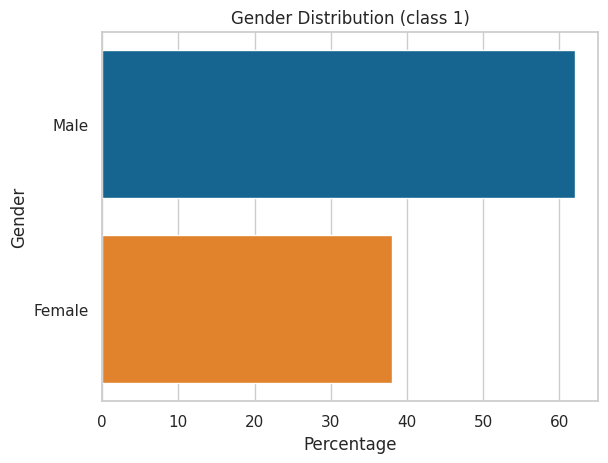

<Figure size 800x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [20]:
#gender_htn = pd.DataFrame({'Gender': ['Male', 'Female'], 'val': [59, 42]})
gender_diab = pd.DataFrame({'Gender': ['Male', 'Female'], 'val': [62, 38]})
#fig = sns.barplot(x = 'val', y = 'Gender', data = gender_htn)
fig = sns.barplot(x = 'val', y = 'Gender', data = gender_diab)
plt.xlabel("Percentage")
plt.ylabel("Gender")
plt.title("Gender Distribution (class 1)") # You can comment this line out if you don't need title
plt.figure(figsize=(8, 8))
plt.style.use('tableau-colorblind10')

plt.show(fig)
plt.savefig('gdrive/My Drive/sample_size/diabetes/diab_gender.png')

In [21]:
#df_dg_htn['age'] = df_dg_htn['dob'].apply(lambda x: (today - x).days // 365)

df_dg_diab['age'] = df_dg_diab['dob'].apply(lambda x: (today - x).days // 365)

In [22]:
#df_dg_htn.head()

df_dg_diab.head()

,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label,age,text_length
1,2602,56746,25000,M,2076-12-22,WHITE,[**2143-2-26**] 8:47 AM\n CTA ABD & PELVIS ...,49,1,-54,5511
3,2516,63192,25000,M,2130-01-20,WHITE,[**2193-9-9**] 11:45 AM\n CHEST PORT. LINE PLA...,40,1,-107,2447
7,4250,8497,25000,M,2058-06-12,BLACK/AFRICAN AMERICAN,Admission Date: [**2106-6-15**] ...,45,1,-36,6350
9,4464,19502,25000,M,2061-10-06,WHITE,Baseline artifact. Cannot clearly distinguish ...,48,1,-39,395
10,1974,3635,25000,M,2127-05-10,WHITE,MICU NPN 7A-7P\nNEURO: INTACT. SPEECH SLURRED ...,45,1,-105,1272


In [23]:
#df_dg_htn['age'].describe()

df_dg_diab['age'].describe()

count    5000.000000
mean      -58.550200
std        43.839259
min      -138.000000
25%       -87.000000
50%       -61.000000
75%       -35.750000
max       220.000000
Name: age, dtype: float64

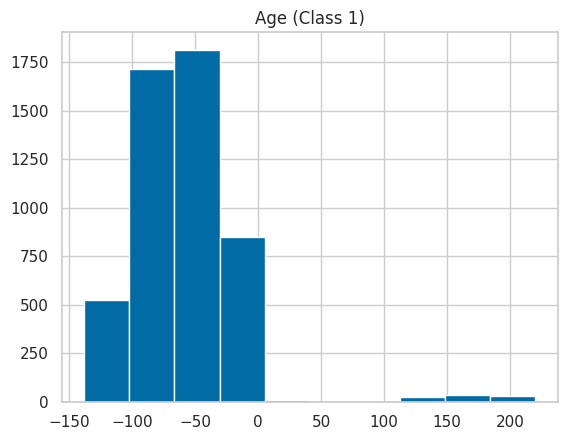

<Figure size 800x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [24]:
#df_dg_htn['age'].hist()
df_dg_diab['age'].hist()
plt.title("Age (Class 1)")
plt.figure(figsize=(8, 8))
plt.style.use('tableau-colorblind10')

plt.show(fig)
plt.savefig('gdrive/My Drive/sample_size/diabetes/diab_age.png')

<Axes: xlabel='age', ylabel='Density'>

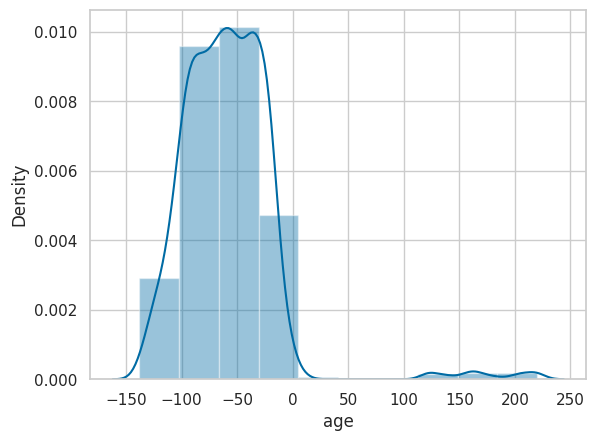

In [25]:
#sns.distplot(df_dg_htn['age'], kde=True, bins = 10)
sns.distplot(df_dg_diab['age'], kde=True, bins = 10)

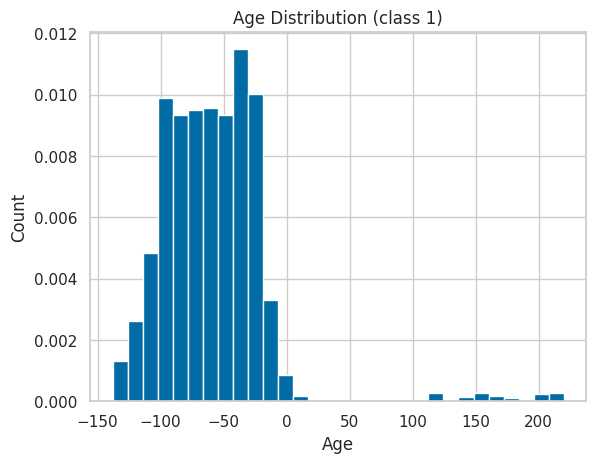

<Figure size 640x480 with 0 Axes>

In [26]:
#plt.hist(df_dg_htn['age'], density=True, bins=30)  # density=False would make counts
plt.hist(df_dg_diab['age'], density=True, bins=30)  # density=False would make counts
plt.style.use('tableau-colorblind10')
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Age Distribution (class 1)') 

plt.show(fig)
plt.savefig('gdrive/My Drive/sample_size/diabetes/diab_age_better.png');

In [27]:
#df_dg_htn['ethnicity'].value_counts()
df_dg_diab['ethnicity'].value_counts()

WHITE                             2970
UNKNOWN/NOT SPECIFIED              740
BLACK/AFRICAN AMERICAN             448
HISPANIC OR LATINO                 209
ASIAN                              121
OTHER                              111
HISPANIC/LATINO - PUERTO RICAN      87
UNABLE TO OBTAIN                    71
PATIENT DECLINED TO ANSWER          50
ASIAN - CHINESE                     33
MULTI RACE ETHNICITY                26
HISPANIC/LATINO - GUATEMALAN        24
HISPANIC/LATINO - DOMINICAN         24
ASIAN - ASIAN INDIAN                20
WHITE - RUSSIAN                     19
PORTUGUESE                           8
HISPANIC/LATINO - SALVADORAN         7
BLACK/HAITIAN                        7
ASIAN - FILIPINO                     6
ASIAN - JAPANESE                     6
ASIAN - CAMBODIAN                    5
AMERICAN INDIAN/ALASKA NATIVE        3
HISPANIC/LATINO - MEXICAN            3
BLACK/CAPE VERDEAN                   2
Name: ethnicity, dtype: int64

In [28]:
#df_dg_htn.head()
df_dg_diab.head()

,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label,age,text_length
1,2602,56746,25000,M,2076-12-22,WHITE,[**2143-2-26**] 8:47 AM\n CTA ABD & PELVIS ...,49,1,-54,5511
3,2516,63192,25000,M,2130-01-20,WHITE,[**2193-9-9**] 11:45 AM\n CHEST PORT. LINE PLA...,40,1,-107,2447
7,4250,8497,25000,M,2058-06-12,BLACK/AFRICAN AMERICAN,Admission Date: [**2106-6-15**] ...,45,1,-36,6350
9,4464,19502,25000,M,2061-10-06,WHITE,Baseline artifact. Cannot clearly distinguish ...,48,1,-39,395
10,1974,3635,25000,M,2127-05-10,WHITE,MICU NPN 7A-7P\nNEURO: INTACT. SPEECH SLURRED ...,45,1,-105,1272


In [29]:
#df_dg_htn['ethnicity-copy']= df_dg_htn['ethnicity']
df_dg_diab['ethnicity-copy']= df_dg_htn['ethnicity']

In [30]:
#changed df_dg_htn to df_dg_diab

df_dg_diab.loc[df_dg_diab['ethnicity'] == 'WHITE', 'ethnicity'] = 'White'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'WHITE - RUSSIAN', 'ethnicity'] = 'White'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'WHITE - BRAZILIAN', 'ethnicity'] = 'White'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'WHITE - OTHER EUROPEAN', 'ethnicity'] = 'White'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'WHITE - EASTERN EUROPEAN', 'ethnicity'] = 'White'

df_dg_diab.loc[df_dg_diab['ethnicity'] == 'UNKNOWN/NOT SPECIFIED', 'ethnicity'] = 'Unknown'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'PATIENT DECLINED TO ANSWER', 'ethnicity'] = 'Unknown'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'UNABLE TO OBTAIN', 'ethnicity'] = 'Unknown'

df_dg_diab.loc[df_dg_diab['ethnicity'] == 'BLACK/AFRICAN AMERICAN', 'ethnicity'] = 'Black'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'BLACK/CAPE VERDEAN', 'ethnicity'] = 'Black'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'BLACK/HAITIAN', 'ethnicity'] = 'Black'

df_dg_diab.loc[df_dg_diab['ethnicity'] == 'ASIAN', 'ethnicity'] = 'Asian'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'ASIAN - CHINESE', 'ethnicity'] = 'Asian'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'ASIAN - ASIAN INDIAN', 'ethnicity'] = 'Asian'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'ASIAN - KOREAN', 'ethnicity'] = 'Asian'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'ASIAN - JAPANESE', 'ethnicity'] = 'Asian'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'ASIAN - OTHER', 'ethnicity'] = 'Asian'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'ASIAN - CAMBODIAN', 'ethnicity'] = 'Asian'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'ASIAN - FILIPINO', 'ethnicity'] = 'Asian'

df_dg_diab.loc[df_dg_diab['ethnicity'] == 'HISPANIC OR LATINO', 'ethnicity'] = 'Hispanic/Latino'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'HISPANIC/LATINO - PUERTO RICAN', 'ethnicity'] = 'Hispanic/Latino'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'HISPANIC/LATINO - GUATEMALAN', 'ethnicity'] = 'Hispanic/Latino'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'HISPANIC/LATINO - HONDURAN', 'ethnicity'] = 'Hispanic/Latino'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'HISPANIC/LATINO - DOMINICAN', 'ethnicity'] = 'Hispanic/Latino'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'HISPANIC/LATINO - SALVADORAN', 'ethnicity'] = 'Hispanic/Latino'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'HISPANIC/LATINO - CUBAN', 'ethnicity'] = 'Hispanic/Latino'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'HISPANIC/LATINO - MEXICAN', 'ethnicity'] = 'Hispanic/Latino'

df_dg_diab.loc[df_dg_diab['ethnicity'] == 'OTHER', 'ethnicity'] = 'Multi-race/Other'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'MULTI RACE ETHNICITY', 'ethnicity'] = 'Multi-race/Other'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'SOUTH AMERICAN', 'ethnicity'] = 'Multi-race/Other'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'CARIBBEAN ISLAND', 'ethnicity'] = 'Multi-race/Other'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'PORTUGUESE - CUBAN', 'ethnicity'] = 'Multi-race/Other'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'MIDDLE EASTERN', 'ethnicity'] = 'Multi-race/Other'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'PORTUGUESE', 'ethnicity'] = 'Multi-race/Other'
df_dg_diab.loc[df_dg_diab['ethnicity'] == 'AMERICAN INDIAN/ALASKA NATIVE', 'ethnicity'] = 'Multi-race/Other'

In [33]:
# Percentage calculation
#(df_dg_htn['ethnicity'].value_counts()/df_dg_htn['ethnicity'].count())*100

(df_dg_diab['ethnicity'].value_counts()/df_dg_diab['ethnicity'].count())*100

White               59.78
Unknown             17.22
Black                9.14
Hispanic/Latino      7.08
Asian                3.82
Multi-race/Other     2.96
Name: ethnicity, dtype: float64

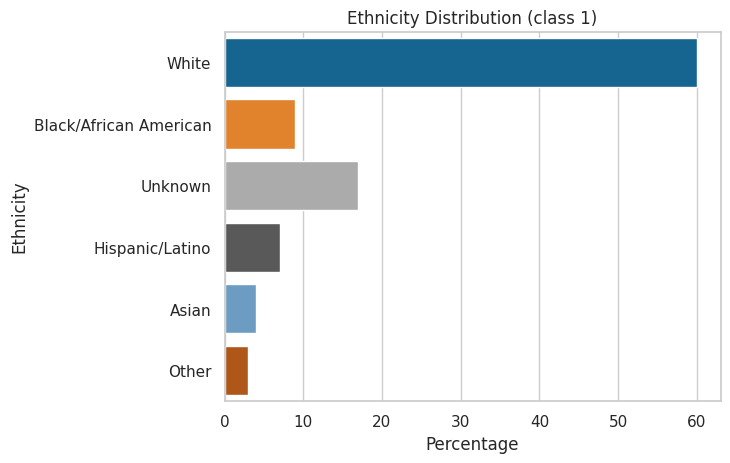

<Figure size 800x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [35]:
#re-do this if needed

#ethnicity_htn = pd.DataFrame({'Ethnicity': ["White", "Black/African American", "Unknown", "Hispanic/Latino", "Other"], 'val': [67, 8, 12, 2, 7]})
ethnicity_diab = pd.DataFrame({'Ethnicity': ["White", "Black/African American", "Unknown", "Hispanic/Latino", "Asian", "Other"], 'val': [60, 9, 17, 7, 4, 3]})
#fig = sns.barplot(x = 'val', y = 'Ethnicity', data = ethnicity_htn)
fig = sns.barplot(x = 'val', y = 'Ethnicity', data = ethnicity_diab)
plt.xlabel("Percentage")
plt.ylabel("Ethnicity")
plt.title("Ethnicity Distribution (class 1)") # You can comment this line out if you don't need title
plt.figure(figsize=(8, 8))
plt.style.use('tableau-colorblind10')

plt.show(fig)
plt.savefig('gdrive/My Drive/sample_size/diabetes/diab_ethnicity.png')

# HTN Text Distributions

# Diabetes Text Distributions

In [36]:
df_dg_diab.head()

,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label,age,text_length,ethnicity-copy
1,2602,56746,25000,M,2076-12-22,White,[**2143-2-26**] 8:47 AM\n CTA ABD & PELVIS ...,49,1,-54,5511,WHITE
3,2516,63192,25000,M,2130-01-20,White,[**2193-9-9**] 11:45 AM\n CHEST PORT. LINE PLA...,40,1,-107,2447,WHITE
7,4250,8497,25000,M,2058-06-12,Black,Admission Date: [**2106-6-15**] ...,45,1,-36,6350,BLACK/AFRICAN AMERICAN
9,4464,19502,25000,M,2061-10-06,White,Baseline artifact. Cannot clearly distinguish ...,48,1,-39,395,WHITE
10,1974,3635,25000,M,2127-05-10,White,MICU NPN 7A-7P\nNEURO: INTACT. SPEECH SLURRED ...,45,1,-105,1272,WHITE


In [ ]:
#df_dg_htn['text_length'] = df_dg_htn['text'].str.len()

#df_dg_diab['text_length'] = df_dg_diab['text'].str.len()

In [37]:
df_dg_diab['text_length'].describe()

count     5000.000000
mean      1932.807200
std       2669.993071
min         26.000000
25%        259.750000
50%       1071.000000
75%       2109.250000
max      28569.000000
Name: text_length, dtype: float64

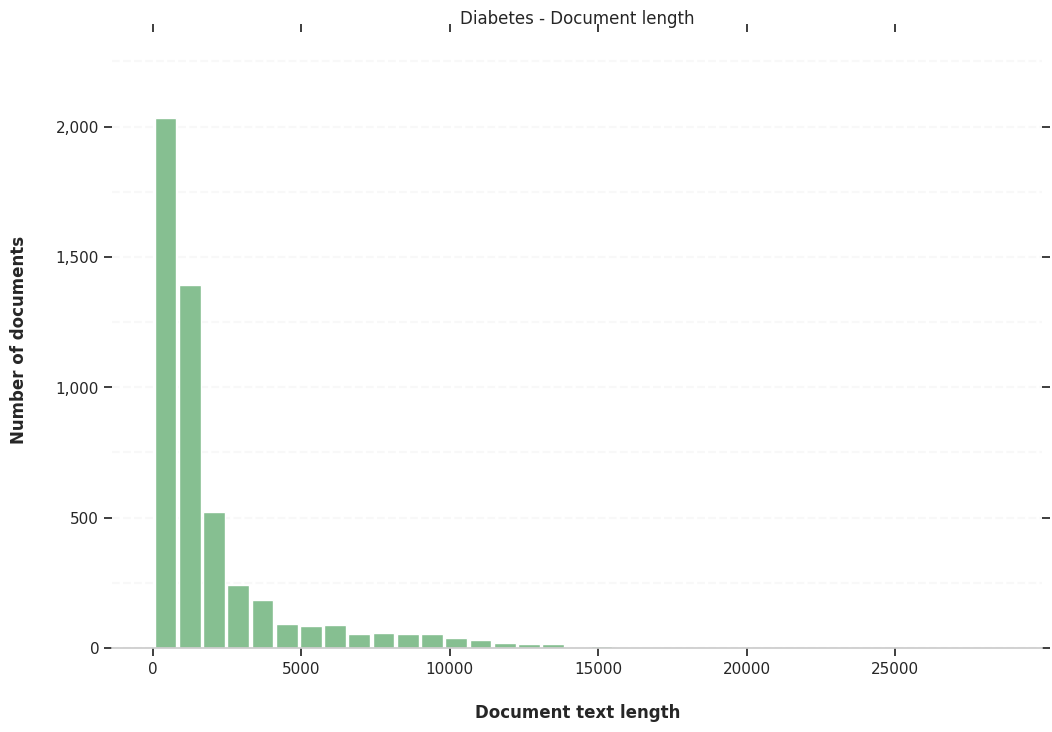

In [39]:
ax = df_dg_diab.hist(column='text_length', bins=35, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Diabetes - Document length")

    # Set x-axis label
    x.set_xlabel("Document text length", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of documents", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Non-HTN Demographics

# Non-Diabetes Demographics

In [40]:
#df_not_htn_dg = df_dg.loc[(df_dg['label'] == 0)]

df_not_diab_dg = df_dg.loc[(df_dg['label'] == 0)]

In [41]:
#df_not_htn_dg['label'].value_counts()

df_not_diab_dg['label'].value_counts()

0    5000
Name: label, dtype: int64

In [42]:
df_not_diab_dg.head()

,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label,age,text_length
0,7389,10935,V290,M,2184-03-22,WHITE,Nursing Progress Note\n\n\n#1 Continues on AMP...,26,0,-161,450
2,7986,93337,30000,M,2083-10-22,WHITE,Sinus rhythm. Normal tracing. Compared to the ...,35,0,-61,138
4,9324,12451,4738,F,2091-07-09,WHITE,Nursing Progress/Transfer note 0700-1300\nPt a...,28,0,-69,1114
5,9374,23841,V3001,F,2187-05-25,ASIAN,"Neonatology NP Note\nbili now 16.6/0.4/16.2, c...",3,0,-165,375
6,8019,53249,V5865,F,2132-06-19,HISPANIC OR LATINO,Sinus rhythm. Normal tracing. Compared to the ...,36,0,-110,146


In [43]:
df_not_diab_dg.describe()

,Unnamed: 0,subject_id,no_of_docs,label,age,text_length
count,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000
mean,7499.500000,36272.875800,33.206600,0.0,-68.909200,2808.017200
std,1443.520003,29118.371136,12.243378,0.0,62.353413,4250.056746
min,5000.000000,27.000000,3.000000,0.0,-179.000000,42.000000
25%,6249.750000,12608.000000,24.000000,0.0,-100.250000,198.000000
50%,7499.500000,24506.000000,35.000000,0.0,-74.000000,591.000000
75%,8749.250000,62334.000000,44.000000,0.0,-49.000000,3152.000000
max,9999.000000,99999.000000,50.000000,0.0,221.000000,17981.000000


In [44]:
df_not_diab_dg['gender'].value_counts()

M    2802
F    2198
Name: gender, dtype: int64

In [45]:
df_not_diab_dg['gender'].value_counts(normalize=True)

M    0.5604
F    0.4396
Name: gender, dtype: float64

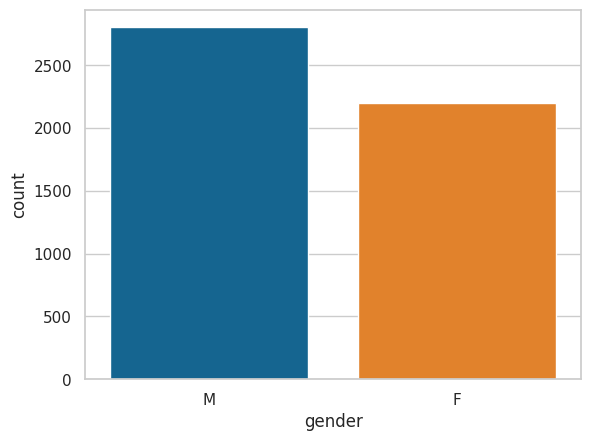

In [46]:
ax = sns.countplot(x="gender",data=df_not_diab_dg)

In [47]:
# Percentage calculation
(df_not_diab_dg['gender'].value_counts()/df_not_diab_dg['gender'].count())*100

M    56.04
F    43.96
Name: gender, dtype: float64

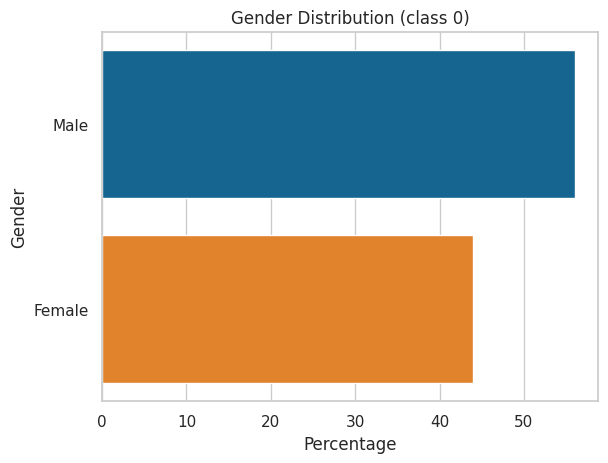

<Figure size 800x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [48]:
gender_not_diab = pd.DataFrame({'Gender': ['Male', 'Female'], 'val': [56, 44]})
fig = sns.barplot(x = 'val', y = 'Gender', data = gender_not_diab)
plt.xlabel("Percentage")
plt.ylabel("Gender")
plt.title("Gender Distribution (class 0)") # You can comment this line out if you don't need title
plt.figure(figsize=(8, 8))
plt.style.use('tableau-colorblind10')

plt.show(fig)
plt.savefig('gdrive/My Drive/sample_size/diabetes/not_diab_gender.png')

In [ ]:
df_not_htn_dg['age'] = df_not_htn_dg['dob'].apply(lambda x: (today - x).days // 365)

In [49]:
df_not_diab_dg.head()

,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label,age,text_length
0,7389,10935,V290,M,2184-03-22,WHITE,Nursing Progress Note\n\n\n#1 Continues on AMP...,26,0,-161,450
2,7986,93337,30000,M,2083-10-22,WHITE,Sinus rhythm. Normal tracing. Compared to the ...,35,0,-61,138
4,9324,12451,4738,F,2091-07-09,WHITE,Nursing Progress/Transfer note 0700-1300\nPt a...,28,0,-69,1114
5,9374,23841,V3001,F,2187-05-25,ASIAN,"Neonatology NP Note\nbili now 16.6/0.4/16.2, c...",3,0,-165,375
6,8019,53249,V5865,F,2132-06-19,HISPANIC OR LATINO,Sinus rhythm. Normal tracing. Compared to the ...,36,0,-110,146


In [50]:
df_not_diab_dg['age'].describe()

count    5000.000000
mean      -68.909200
std        62.353413
min      -179.000000
25%      -100.250000
50%       -74.000000
75%       -49.000000
max       221.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Non-Diabetes Age')

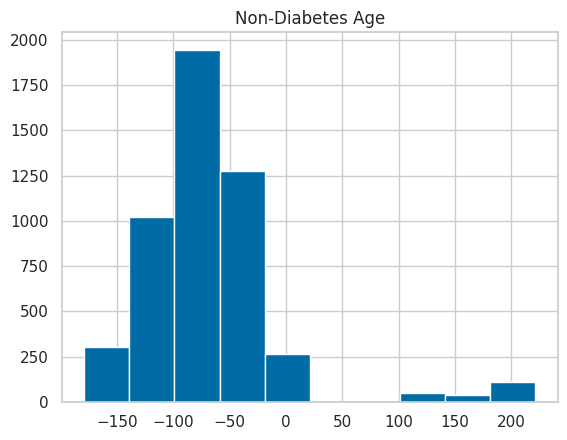

In [51]:
df_not_diab_dg['age'].hist()
plt.title('Non-Diabetes Age')

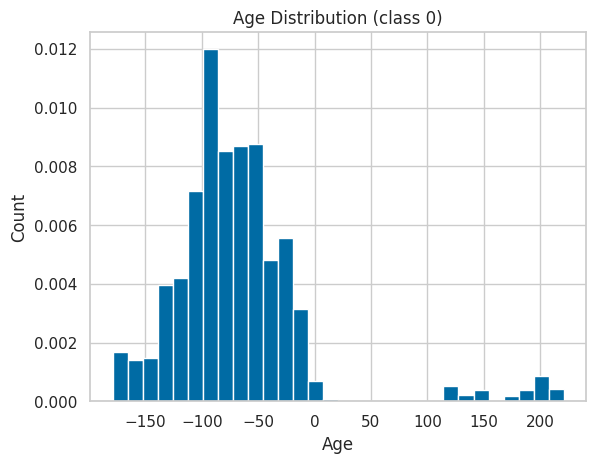

In [52]:
plt.hist(df_not_diab_dg['age'], density=True, bins=30)  # density=False would make counts
plt.style.use('tableau-colorblind10')
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Age Distribution (class 0)') ;

In [53]:
df_not_diab_dg['ethnicity'].value_counts()

WHITE                             3349
BLACK/AFRICAN AMERICAN             477
UNKNOWN/NOT SPECIFIED              416
HISPANIC OR LATINO                 187
OTHER                              164
ASIAN                              125
HISPANIC/LATINO - PUERTO RICAN      41
UNABLE TO OBTAIN                    39
PATIENT DECLINED TO ANSWER          37
ASIAN - CHINESE                     36
HISPANIC/LATINO - CUBAN             32
BLACK/CAPE VERDEAN                  25
WHITE - EASTERN EUROPEAN            18
HISPANIC/LATINO - GUATEMALAN        12
HISPANIC/LATINO - COLOMBIAN         10
BLACK/HAITIAN                        8
ASIAN - OTHER                        7
HISPANIC/LATINO - SALVADORAN         5
WHITE - BRAZILIAN                    4
ASIAN - ASIAN INDIAN                 4
MULTI RACE ETHNICITY                 4
Name: ethnicity, dtype: int64

In [55]:
df_not_diab_dg['ethnicity-copy']=df_not_diab_dg['ethnicity']

In [56]:
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'WHITE', 'ethnicity'] = 'White'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'WHITE - RUSSIAN', 'ethnicity'] = 'White'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'WHITE - BRAZILIAN', 'ethnicity'] = 'White'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'WHITE - OTHER EUROPEAN', 'ethnicity'] = 'White'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'WHITE - EASTERN EUROPEAN', 'ethnicity'] = 'White'

df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'UNKNOWN/NOT SPECIFIED', 'ethnicity'] = 'Unknown'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'PATIENT DECLINED TO ANSWER', 'ethnicity'] = 'Unknown'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'UNABLE TO OBTAIN', 'ethnicity'] = 'Unknown'

df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'BLACK/AFRICAN AMERICAN', 'ethnicity'] = 'Black'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'BLACK/CAPE VERDEAN', 'ethnicity'] = 'Black'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'BLACK/HAITIAN', 'ethnicity'] = 'Black'

df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'ASIAN', 'ethnicity'] = 'Asian'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'ASIAN - CHINESE', 'ethnicity'] = 'Asian'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'ASIAN - ASIAN INDIAN', 'ethnicity'] = 'Asian'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'ASIAN - KOREAN', 'ethnicity'] = 'Asian'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'ASIAN - JAPANESE', 'ethnicity'] = 'Asian'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'ASIAN - OTHER', 'ethnicity'] = 'Asian'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'ASIAN - CAMBODIAN', 'ethnicity'] = 'Asian'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'ASIAN - FILIPINO', 'ethnicity'] = 'Asian'

df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'HISPANIC OR LATINO', 'ethnicity'] = 'Hispanic/Latino'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'HISPANIC/LATINO - PUERTO RICAN', 'ethnicity'] = 'Hispanic/Latino'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'HISPANIC/LATINO - GUATEMALAN', 'ethnicity'] = 'Hispanic/Latino'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'HISPANIC/LATINO - HONDURAN', 'ethnicity'] = 'Hispanic/Latino'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'HISPANIC/LATINO - DOMINICAN', 'ethnicity'] = 'Hispanic/Latino'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'HISPANIC/LATINO - SALVADORAN', 'ethnicity'] = 'Hispanic/Latino'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'HISPANIC/LATINO - CUBAN', 'ethnicity'] = 'Hispanic/Latino'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'HISPANIC/LATINO - COLOMBIAN', 'ethnicity'] = 'Hispanic/Latino'

df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'OTHER', 'ethnicity'] = 'Multi-race/Other'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'MULTI RACE ETHNICITY', 'ethnicity'] = 'Multi-race/Other'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'SOUTH AMERICAN', 'ethnicity'] = 'Multi-race/Other'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'CARIBBEAN ISLAND', 'ethnicity'] = 'Multi-race/Other'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'PORTUGUESE - CUBAN', 'ethnicity'] = 'Multi-race/Other'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'MIDDLE EASTERN', 'ethnicity'] = 'Multi-race/Other'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'PORTUGUESE', 'ethnicity'] = 'Multi-race/Other'
df_not_diab_dg.loc[df_not_diab_dg['ethnicity'] == 'AMERICAN INDIAN/ALASKA NATIVE', 'ethnicity'] = 'Multi-race/Other'

In [59]:
# Percentage calculation
(df_not_diab_dg['ethnicity'].value_counts()/df_not_diab_dg['ethnicity'].count())*100

White               67.42
Black               10.20
Unknown              9.84
Hispanic/Latino      5.74
Asian                3.44
Multi-race/Other     3.36
Name: ethnicity, dtype: float64

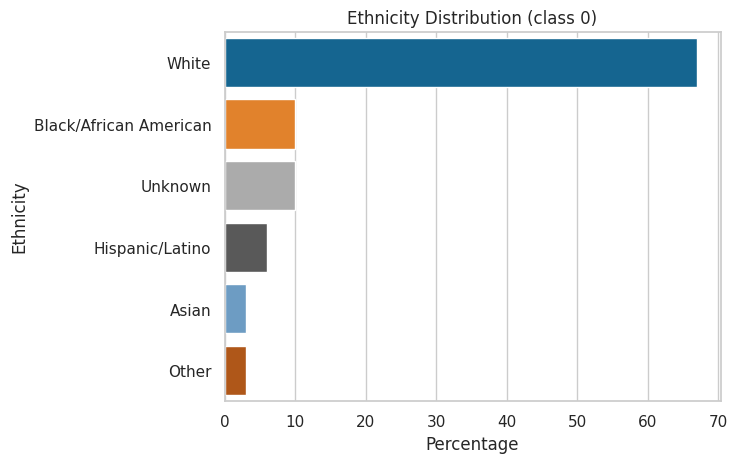

<Figure size 800x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [60]:
ethnicity_not_htn = pd.DataFrame({'Ethnicity': ["White", "Black/African American", "Unknown", "Hispanic/Latino", "Asian", "Other"], 'val': [67, 10, 10, 6, 3, 3]})
fig = sns.barplot(x = 'val', y = 'Ethnicity', data = ethnicity_not_htn)
plt.xlabel("Percentage")
plt.ylabel("Ethnicity")
plt.title("Ethnicity Distribution (class 0)") # You can comment this line out if you don't need title
plt.figure(figsize=(8, 8))
plt.style.use('tableau-colorblind10')

plt.show(fig)
plt.savefig('gdrive/My Drive/sample_size/diabetes/not_diab_ethnicity.png')

# Non-HTN Text Distributions

# Non-Diabetes Text Distributions

In [ ]:
df_not_htn_dg['text_length'] = df_not_htn_dg['text'].str.len()

In [61]:
df_not_diab_dg.head()

,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label,age,text_length,ethnicity-copy
0,7389,10935,V290,M,2184-03-22,White,Nursing Progress Note\n\n\n#1 Continues on AMP...,26,0,-161,450,WHITE
2,7986,93337,30000,M,2083-10-22,White,Sinus rhythm. Normal tracing. Compared to the ...,35,0,-61,138,WHITE
4,9324,12451,4738,F,2091-07-09,White,Nursing Progress/Transfer note 0700-1300\nPt a...,28,0,-69,1114,WHITE
5,9374,23841,V3001,F,2187-05-25,Asian,"Neonatology NP Note\nbili now 16.6/0.4/16.2, c...",3,0,-165,375,ASIAN
6,8019,53249,V5865,F,2132-06-19,Hispanic/Latino,Sinus rhythm. Normal tracing. Compared to the ...,36,0,-110,146,HISPANIC OR LATINO


In [62]:
df_not_diab_dg['text_length'].describe()

count     5000.000000
mean      2808.017200
std       4250.056746
min         42.000000
25%        198.000000
50%        591.000000
75%       3152.000000
max      17981.000000
Name: text_length, dtype: float64

In [63]:
df_not_diab_dg['text_length_grouped']= df_not_diab_dg['text_length']

In [64]:
df_not_diab_dg.loc[df_not_diab_dg['text_length_grouped'] >6000, 'df_not_diab_dg'] = '6000+'

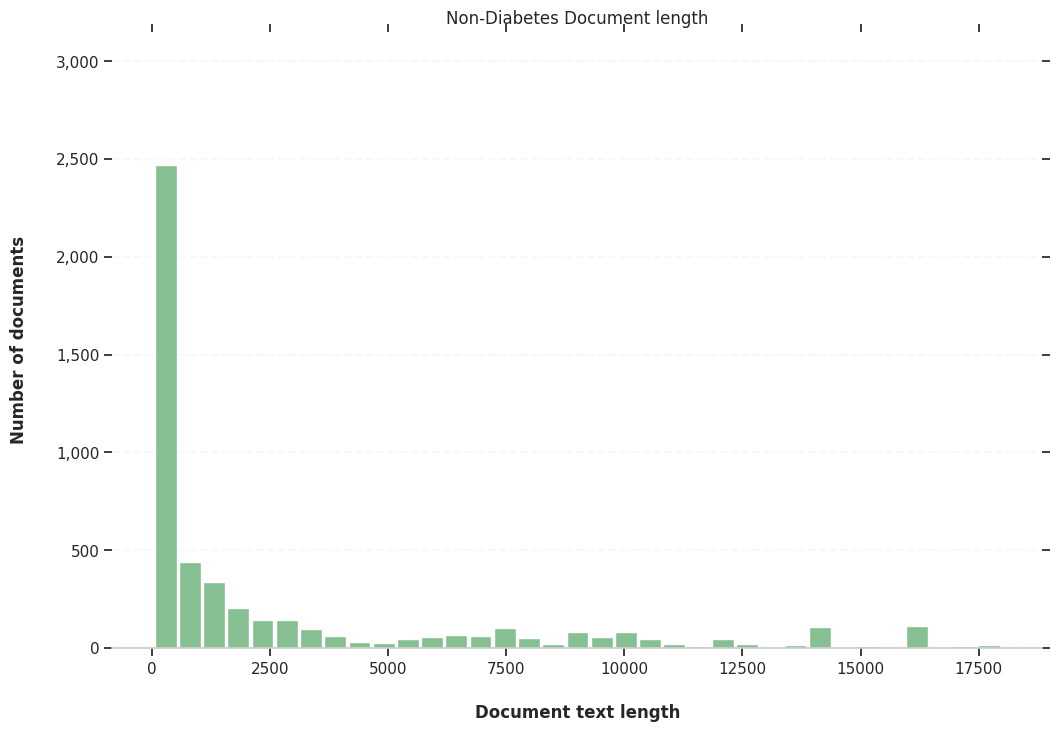

In [65]:
ax = df_not_diab_dg.hist(column='text_length', bins=35, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Non-Diabetes Document length")

    # Set x-axis label
    x.set_xlabel("Document text length", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of documents", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

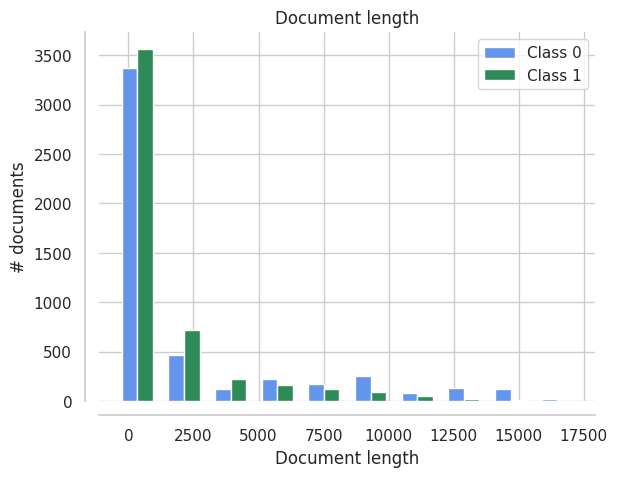

<Figure size 1600x1600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
import seaborn
#seaborn.set(style='ticks')


np.random.seed(0)
df = pandas.DataFrame(np.random.normal(size=(37,2)), columns=['A', 'B'])
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(df_not_diab_dg['text_length'])
b_heights, b_bins = np.histogram(df_dg_diab['text_length'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
seaborn.despine(ax=ax, offset=10)

plt.title('Document length')
ax.legend(['Class 0', 'Class 1'])

ax.set_ylabel('# documents')
ax.set_xlabel('Document length')

plt.figure(figsize=(16, 16))
plt.style.use('tableau-colorblind10')

plt.show(fig)
plt.savefig('gdrive/My Drive/sample_size/diabetes/doc_dist.png')

<BarContainer object of 10 artists>

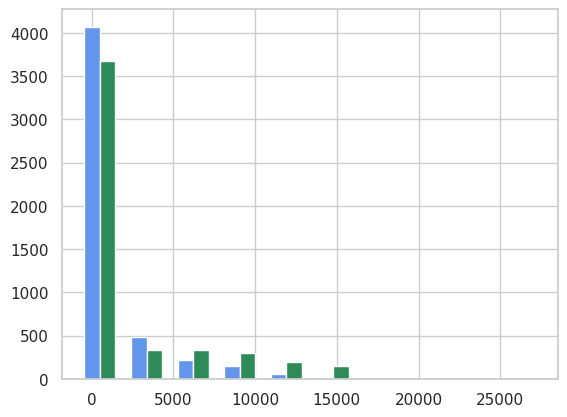

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
#import seaborn
#seaborn.set(style='ticks')

#np.random.seed(0)
#df = pandas.DataFrame(np.random.normal(size=(37,2)), columns=['A', 'B'])
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(df_dg_diab['text_length'])
b_heights, b_bins = np.histogram(df_not_diab_dg['text_length'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
#seaborn.despine(ax=ax, offset=10)

In [ ]:
df_dg_htn.head()

,Unnamed: 0,subject_id,icd9_code,gender,dob,ethnicity,text,no_of_docs,label,age,text_length,ethnicity-copy
0,0,1738,4019,F,2090-12-20,White,CONDITION UPDATE\nD: PLEASE SEE CAREVUE FOR SP...,48,1,-68,1417,WHITE
1,1,23055,4019,F,2044-10-15,Unknown,MSICU NSG ADMIT NOTE 1400-1900\n\n60 YO woman ...,50,1,-22,483,UNKNOWN/NOT SPECIFIED
2,2,21457,4019,F,2059-06-19,Black,"[**2121-7-5**] 5:18 PM\n TOE(S), 2+ VIEW RIGHT...",41,1,-37,807,BLACK/AFRICAN AMERICAN
3,3,1048,4019,M,2116-04-12,White,Sinus rhythm. Left atrial abnormality. Promine...,18,1,-94,229,WHITE
4,4,18041,4019,M,2133-06-05,White,[**2196-8-1**] 7:07 PM\n CTA CHEST W&W/O C &RE...,42,1,-111,5867,WHITE


In [70]:
df_dg_diab['Class 1'] = df_dg_diab['text_length']

In [68]:
df_not_diab_dg['Class 0'] = df_not_diab_dg['text_length']

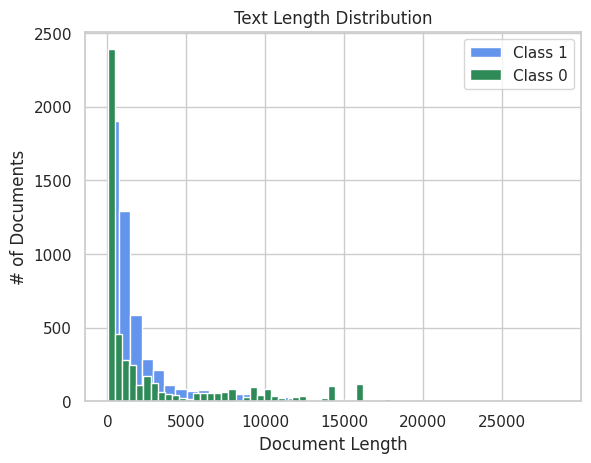

<Figure size 4000x4000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas

df_not_diab_dg=df_not_diab_dg.rename(columns={"Not_Diabetes_Text_Length": "Class 0"})
df_dg_diab=df_dg_diab.rename(columns={"Diabetes_Text_Length": "Class 1"})


#np.random.seed(0)
#df = pandas.DataFrame(np.random.normal(size=(37,2)), columns=['A', 'B'])

#ax.xaxis.set_ticks(np.arange(start, end, stepsize))

df_dg_diab['Class 1'].hist(bins=40, legend=True, color='cornflowerblue')
df_not_diab_dg['Class 0'].hist(bins=40, legend=True, color='seagreen')

plt.xlabel("Document Length")
plt.ylabel("# of Documents")
plt.title("Text Length Distribution") # You can comment this line out if you don't need title
plt.figure(figsize=(40, 40))
plt.style.use('tableau-colorblind10')


plt.show(fig)
plt.savefig('gdrive/My Drive/sample_size/diabetes/text_length_new.png')